# Công thức nội suy trung tâm Stirling 

## Điều kiện: các mốc là cách đều nhau và số mốc sử dụng là một số lẻ

# Bắt đầu chương trình

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hoocnerChia(a, value):
    b = []
    b.append(a[0])
    for i in range(1, len(a)):
        b.append(b[i - 1] * value + a[i])
    return b

In [3]:
def hoocnerNhanBosung(coeffPolyTich, t):
    if len(coeffPolyTich) == 0:
        coeffPolyTich.append(1)
        coeffPolyTich.append(-t)
    else:
        coeffPolyTich.append(0)
        temp = coeffPolyTich.copy()
        for i in range(1, len(coeffPolyTich)):
            coeffPolyTich[i] = coeffPolyTich[i] - t * temp[i - 1]
    return coeffPolyTich

In [4]:
def saiPhan(f_0, f_1, x0, xk, yk):
    if xk > x0:
        temp = f_0.copy()
        f_0.append(0)
        f_0[0] = yk
        for i in range(1, len(f_0)):
            f_0[i] = f_0[i - 1] - temp[i - 1]
        f_1.append(f_0[len(f_0) - 1])
    else:
        temp = f_1.copy()
        f_1.append(0)
        f_1[0] = yk
        for i in range(1, len(f_1)):
            f_1[i] = temp[i - 1] - f_1[i - 1]
        f_0.append(f_1[len(f_1) - 1])
    return f_0, f_1

In [5]:
def stirlingFormula(heSoDaThuc, coeffTich, f_0, f_1, k, x0, x1, x2, y1, y2, giaiThua_k):
    #da thuc theo an t; k được hiểu là mốc ở vị trí mốc thứ k thêm vào (vị trí y2)
    #k luôn là số chẵn vì số mốc sử dụng là số lẻ
    #bat dau chay ham voi k le bat dau tu 1
    f_0, f_1 = saiPhan(f_0, f_1, x0, x2, y2)
    f_0, f_1 = saiPhan(f_0, f_1, x0, x1, y1)

    #su dung dat u = t^2 => t^2; t^2(t^2 - 1); t^2(t^2 - 1)(t^2 - 4); t^2(t^2 - 4)(t^2 - 9)
    coeffTich = hoocnerNhanBosung(coeffTich, (k/2 - 1/2)**2)

    giaiThua_k *= len(heSoDaThuc)
    c_le = (f_1[len(f_1) - 2] + f_0[(len(f_0) - 2)]) / (2 * giaiThua_k)
    giaiThua_k *= len(heSoDaThuc) + 1
    c_chan = f_1[len(f_1) - 1] / giaiThua_k
    
    #tinh he so da thuc voi da thuc tich them vao la da thuc bac le
    heSoDaThucCu = heSoDaThuc.copy()
    heSoDaThuc.append(0)
    for i in range(1, len(heSoDaThuc)):
        if i % 2 == 0:
            heSoDaThuc[i] = heSoDaThucCu[i - 1] + c_le * coeffTich[int((i + 1) / 2)]
        else:
            heSoDaThuc[i] = heSoDaThucCu[i - 1]
    heSoDaThuc[0] = c_le

    #tinh he so da thuc voi da thuc tich them vao la da thuc bac chan
    heSoDaThucCu = heSoDaThuc.copy()
    heSoDaThuc.append(0)
    for i in range(1, len(heSoDaThuc)):
        if i % 2 == 0:
            heSoDaThuc[i] = heSoDaThucCu[i - 1] + c_chan * coeffTich[int((i + 1) / 2)]
        else:
            heSoDaThuc[i] = heSoDaThucCu[i - 1]
    heSoDaThuc[0] = c_chan

    return heSoDaThuc, coeffTich, f_0, f_1, giaiThua_k

In [6]:
def sortData(path):
    if path.endswith('.csv'):
        data = pd.read_csv(path)
    elif path.endswith('.txt'):
        print("su dung doc file .txt")
    dataX = data['x']
    dataY = data['y']
    for i in range(len(dataX)):
        indexMin = i
        for j in range(i + 1, len(dataX)):
            if dataX[j] < dataX[indexMin]:
                indexMin = j
        if indexMin != i:
            dataX[indexMin], dataX[i] = dataX[i], dataX[indexMin]
            dataY[indexMin], dataY[i] = dataY[i], dataY[indexMin]
    return dataX, dataY

# Nhập mốc nội suy ban đầu

## Truyền dữ liệu vào và hàm kiểm tra điều kiện đầu vào của mốc ban đầu chọn

In [7]:
path = 'input1.csv'
dataX, dataY = sortData(path)
def kiemTraMoc(dataX, x0):
    h = dataX[1] - dataX[0]
    m = round((x0 - dataX[0])/h)
    if x0 > dataX[len(dataX) - 1] or x0 < dataX[0] or x0 - (dataX[0] + m * h) > 1e-10:
        print("Moc noi suy duoc chon ban dau la khong hop le")
        print("Quay lai, chon lai moc noi suy")
    else:
        print("Moc noi suy ban dau hop le. Chuong trinh tiep tuc")

## Chọn mốc nội suy ban đầu

In [8]:
print("Mang gia tri x", dataX)

Mang gia tri x 0    0.2
1    0.4
2    0.6
3    0.8
4    1.0
5    3.0
Name: x, dtype: float64


In [9]:
#Lua chon moc noi suy ban dau
x0 = 0.6
kiemTraMoc(dataX, x0)

Moc noi suy ban dau hop le. Chuong trinh tiep tuc


# Chọn số mốc nội suy sử dụng

## Kiểm tra sự hợp lệ của số lượng mốc nội suy lựa chọn

In [10]:
def checkSoMoc(dataX, soMoc, x0):
    h = dataX[1] - dataX[0]
    m = round((x0 - dataX[0])/h)
    if m <= len(dataX)/2:
        n = 2 * m + 1
    else:
        n = 2 * (len(dataX) - m) + 1
    if n > len(dataX):
        n = len(dataX)
        
    #check xem so moc chon co hop le hay khong. So moc noi suy su dung phai la so le
    if soMoc > n or soMoc <= 0 or soMoc % 2 == 0:
        print("so luong moc lua chon la khong hop le")
        print("Nhap lai so moc. So moc phai la so \"le\" thuoc trong khoang tu:", 0, "->", n)
    else:
        print("so luong moc la hop le. Tiep tuc chuong trinh")

## Nhập vào số mốc nội suy lựa chọn

In [11]:
#lua chon so moc
soMoc = 5
checkSoMoc(dataX, soMoc, x0)

so luong moc la hop le. Tiep tuc chuong trinh


# Sắp xếp lại dữ liệu theo trình tự thêm mốc nội suy

In [12]:
def sortGauss(dataX, dataY, x0, soMoc):
    x = []
    y = []
    m = round((x0 - dataX[0]) / (dataX[1] - dataX[0]))
    for i in range(soMoc):
        if i % 2 == 1:
            k = int((i + 1)/2)
            x.append(dataX[m + k])
            y.append(dataY[m + k])
        else:
            k = int(-(i + 1)/2)
            x.append(dataX[m + k])
            y.append(dataY[m + k])
    return x, y

In [13]:
x, y = sortGauss(dataX, dataY, x0, soMoc)
print(x)

[0.6, 0.8, 0.4, 1.0, 0.2]


# Hàm Main chương trình chính

In [14]:
def main():
    heSoDaThuc = []
    coeffTich = []
    f_0 = [] 
    f_1 = [] 
    giaiThua_k = 1
    h = dataX[1] - dataX[0]
    with open("output.txt", "w") as out:
        #buoc co so
        x, y = sortGauss(dataX, dataY, x0, soMoc)
        heSoDaThuc.append(y[0])
        f_0.append(y[0])
        f_1.append(y[0])
        out.writelines("\n\nMoc noi suy ban dau duoc chon la: ({}, {})".format(x[0], y[0]))
        #cac buoc them dan 2 moc tiep theo
        for i in range(1, soMoc, 2):
            heSoDaThuc, coeffTich, f_0, f_1, giaiThua_k = stirlingFormula(heSoDaThuc, coeffTich, f_0, f_1, i, x0, x[i], x[i + 1], y[i], y[i + 1], giaiThua_k)
            
            out.writelines("\n\n--------------------------------------------------------------------------------------")
            out.writelines("\nDa thuc moi sau khi them moc 2 noi suy: ({}, {}); ({}, {}) ".format(x[i], y[i], x[i + 1], y[i + 1]))
            out.write("\nTap cac moc noi suy: \t")
            for j in range(i + 2):
                out.write("({}, {}); \t".format(x[j], y[j]))
            out.write("\nDa thuc bac {}: \nP(t) =: ".format(i + 1))
            for j in range(len(heSoDaThuc)):
                out.write("{} * x^{} \t + \t".format(heSoDaThuc[j], len(heSoDaThuc) - 1 - j))
            out.write("\n\nThu lai\n")
            for j in range(i + 2):
                out.writelines("\nTai du lieu x = {}".format(x[j]))
                a = hoocnerChia(heSoDaThuc, (x[j] - x[0])/h)
                out.writelines("\nPn(x) - y = {}".format(a[len(heSoDaThuc) - 1] - y[j]))
    return heSoDaThuc, coeffTich, f_0, f_1, giaiThua_k

In [15]:
heSoDaThuc, coeffTich, f_0, f_1, giaiThua_k = main()

# Vẽ biểu đồ kết quả

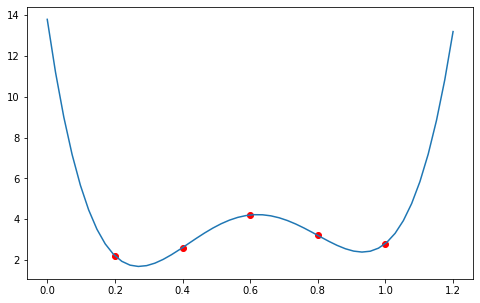

In [22]:
x, y = sortGauss(dataX, dataY, x0, soMoc)
h = dataX[1] - dataX[0]
xTest = np.linspace(x[0] - 3*h, x[len(x) - 1] + 5*h, 50)
result = []
for x1 in xTest:
    t = (x1 - x[0])/h
    result.append(hoocnerChia(heSoDaThuc, t)[len(heSoDaThuc) - 1])

#ve bieu do duong
plt.plot(xTest, result)
plt.scatter(x, y, color = 'r')
fig = plt.gcf()
fig.set_size_inches(8,5, forward = False)

plt.show()